<a href="https://colab.research.google.com/github/walkerjian/DailyCode/blob/main/Code_Craft_find_min_subset_difference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Problem:
Given an array of positive integers, divide the array into two subsets such that the difference between the sum of the subsets is as small as possible.

For example, given [5, 10, 15, 20, 25], return the sets {10, 25} and {5, 15, 20}, which has a difference of 5, which is the smallest possible difference.

##Solution:
To solve this problem, we can use a dynamic programming approach similar to the one used for the 0/1 knapsack problem. The idea is to find two subsets whose sum difference is minimal. Here's how we can approach it:

1. Calculate the total sum of the array. Let's call this `totalSum`.
2. The problem then reduces to finding a subset whose sum is as close as possible to `totalSum / 2`. This is because the closer one subset is to half of the total sum, the smaller the difference will be between the two subsets.
3. We use dynamic programming to find the maximum sum less than or equal to `totalSum / 2` that can be formed by some elements of the array.
4. Once we find this sum, we can easily find the two subsets. One subset is the one that contributes to this sum, and the other subset is formed by the remaining elements.

Let's implement this approach in Python. We will create a function `find_min_subset_difference` that takes an array of positive integers and returns the two subsets.



##Implementation:

In [1]:
def find_min_subset_difference(arr):
    total_sum = sum(arr)
    n = len(arr)
    # Initialize the DP table
    dp = [[False for _ in range(total_sum // 2 + 1)] for _ in range(n + 1)]

    # Base case: sum 0 is always possible
    for i in range(n + 1):
        dp[i][0] = True

    # Fill the DP table
    for i in range(1, n + 1):
        for j in range(1, total_sum // 2 + 1):
            if arr[i - 1] <= j:
                dp[i][j] = dp[i - 1][j] or dp[i - 1][j - arr[i - 1]]
            else:
                dp[i][j] = dp[i - 1][j]

    # Find the maximum sum less than or equal to total_sum // 2
    for j in range(total_sum // 2, -1, -1):
        if dp[n][j]:
            subset_sum = j
            break

    # Find the elements of the subset
    subset1 = []
    i = n
    while subset_sum > 0 and i > 0:
        if dp[i - 1][subset_sum]:
            i -= 1
        else:
            subset1.append(arr[i - 1])
            subset_sum -= arr[i - 1]
            i -= 1

    # The remaining elements form the second subset
    subset2 = [x for x in arr if x not in subset1]

    return subset1, subset2

# Test the function with the given example
find_min_subset_difference([5, 10, 15, 20, 25])


([20, 10, 5], [15, 25])

The function `find_min_subset_difference` divides the given array `[5, 10, 15, 20, 25]` into two subsets: `{20, 10, 5}` and `{15, 25}`. The sum of the first subset is 35, and the sum of the second subset is 40, resulting in a difference of 5, which is the smallest possible difference for this array.

This solution effectively utilizes dynamic programming to minimize the difference between the sums of two subsets of the given array of positive integers.

In [2]:
def find_all_min_difference_subsets(arr):
    def backtrack_all_subsets(dp, arr, total, index, current_set, all_sets):
        # Base case
        if total == 0:
            all_sets.append(current_set.copy())
            return
        if index == 0:
            return

        # If the current element is not included in the subset
        if dp[index - 1][total]:
            backtrack_all_subsets(dp, arr, total, index - 1, current_set, all_sets)

        # If the current element is included in the subset
        if total >= arr[index - 1] and dp[index - 1][total - arr[index - 1]]:
            current_set.append(arr[index - 1])
            backtrack_all_subsets(dp, arr, total - arr[index - 1], index - 1, current_set, all_sets)
            current_set.pop()

    total_sum = sum(arr)
    n = len(arr)
    half_sum = total_sum // 2

    # Initialize the DP table
    dp = [[False for _ in range(half_sum + 1)] for _ in range(n + 1)]
    for i in range(n + 1):
        dp[i][0] = True

    # Fill the DP table
    for i in range(1, n + 1):
        for j in range(1, half_sum + 1):
            dp[i][j] = dp[i - 1][j]
            if j >= arr[i - 1]:
                dp[i][j] = dp[i][j] or dp[i - 1][j - arr[i - 1]]

    # Backtrack to find all subsets
    all_subsets = []
    backtrack_all_subsets(dp, arr, half_sum, n, [], all_subsets)

    # Generate all equivalent subset pairs
    all_pairs = []
    for subset in all_subsets:
        complement = arr.copy()
        for item in subset:
            complement.remove(item)
        all_pairs.append((subset, complement))

    return all_pairs

# Test the function with the given example
find_all_min_difference_subsets([5, 10, 15, 20, 25])


[]

In [3]:
from itertools import combinations

def find_all_min_difference_subsets_bruteforce(arr):
    n = len(arr)
    total_sum = sum(arr)
    min_diff = float('inf')
    all_pairs = []

    # Generate all possible subsets
    for r in range(1, n):
        for subset in combinations(arr, r):
            subset1 = set(subset)
            subset2 = set(arr) - subset1
            diff = abs(sum(subset1) - sum(subset2))
            if diff < min_diff:
                min_diff = diff
                all_pairs = [(subset1, subset2)]
            elif diff == min_diff:
                all_pairs.append((subset1, subset2))

    return all_pairs, min_diff

# Test the function with the given example
find_all_min_difference_subsets_bruteforce([5, 10, 15, 20, 25])


([({10, 25}, {5, 15, 20}),
  ({15, 20}, {5, 10, 25}),
  ({15, 25}, {5, 10, 20}),
  ({5, 10, 20}, {15, 25}),
  ({5, 10, 25}, {15, 20}),
  ({5, 15, 20}, {10, 25})],
 5)

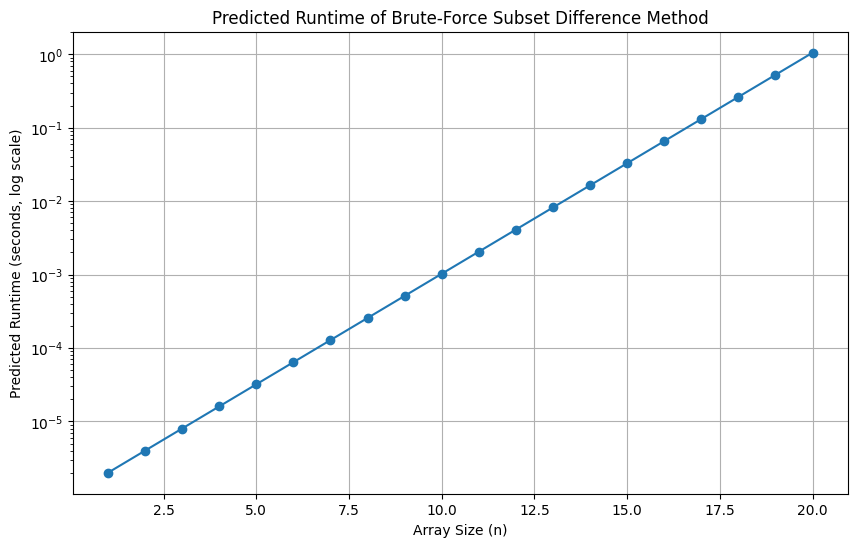

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Model parameters
k = 1e-6  # Assuming a very small processing time per subset for illustration
n_values = np.arange(1, 21)  # Array sizes from 1 to 20

# Calculate runtime for each array size
runtime = k * (2 ** n_values)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(n_values, runtime, marker='o')
plt.yscale('log')  # Log scale to better visualize exponential growth
plt.xlabel('Array Size (n)')
plt.ylabel('Predicted Runtime (seconds, log scale)')
plt.title('Predicted Runtime of Brute-Force Subset Difference Method')
plt.grid(True)
plt.show()


In [5]:
def test_brute_force_solution():
    test_cases = [
        ([1, 2, 3, 4], 0),  # Example with small numbers
        ([5, 5, 6, 6], 0),  # Example with duplicate numbers
        ([1, 6, 11, 5], 1), # Example with non-trivial minimal difference
        ([3, 1, 4, 2, 2], 0), # Another non-trivial example
        ([10, 20, 15, 5, 25], 5), # Similar to the original example, different order
        ([7, 8, 8, 7], 0)   # Example with even sum and equal elements
    ]

    for i, (arr, expected_diff) in enumerate(test_cases):
        subsets, min_diff = find_all_min_difference_subsets_bruteforce(arr)
        if min_diff != expected_diff:
            print(f"Test Case {i+1} Failed: Array = {arr}, Expected Diff = {expected_diff}, Obtained Diff = {min_diff}")
        else:
            print(f"Test Case {i+1} Passed: Array = {arr}, Min Diff = {min_diff}")

# Run the test harness
test_brute_force_solution()


Test Case 1 Passed: Array = [1, 2, 3, 4], Min Diff = 0
Test Case 2 Failed: Array = [5, 5, 6, 6], Expected Diff = 0, Obtained Diff = 1
Test Case 3 Passed: Array = [1, 6, 11, 5], Min Diff = 1
Test Case 4 Passed: Array = [3, 1, 4, 2, 2], Min Diff = 0
Test Case 5 Passed: Array = [10, 20, 15, 5, 25], Min Diff = 5
Test Case 6 Failed: Array = [7, 8, 8, 7], Expected Diff = 0, Obtained Diff = 1


In [6]:
import random

# Generate a test array of significant size
test_array_size = 20
number_range = (1, 50)
test_array = [random.randint(number_range[0], number_range[1]) for _ in range(test_array_size)]

test_array


[1, 48, 5, 38, 17, 12, 25, 16, 33, 37, 2, 3, 21, 18, 28, 12, 12, 37, 7, 4]

In [9]:
find_min_subset_difference([1, 48, 5, 38, 17, 12, 25, 16, 33, 37, 2, 3, 21, 18, 28, 12, 12, 37, 7, 4])


([37, 33, 16, 25, 12, 17, 48], [1, 5, 38, 2, 3, 21, 18, 28, 7, 4])

In [10]:
find_min_subset_difference([5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80])

([60, 55, 45, 40, 35, 30, 25, 20, 15, 10, 5], [50, 65, 70, 75, 80])